PROJECT TASKS

PART 1: DATA LOADING & EXPLORATION (Using Pandas)

1. Load all four CSV files into separate DataFrames

2. Display the first and last 5 rows of each dataset

3. Check basic information about each dataset:

   * Number of rows and columns
   * Data types of each column
   * Memory usage

4. Generate statistical summaries for numerical columns

5. Identify unique values in categorical columns (category, payment_method, city, gender)

In [93]:
import numpy as np
import pandas as pd
import random

random.seed(42)
np.random.seed(42)

n_rows = 5000

order_id = [f"ORD{str(i).zfill(4)}" for i in range(1, n_rows + 1)]

customer_id = np.random.choice(
    [f"CUST{str(i).zfill(4)}" for i in range(1, 501)],
    size=n_rows
)

product_id = np.random.choice(
    [f"PROD{str(i).zfill(4)}" for i in range(1, 301)],
    size=n_rows
)

categories = ["Electronics", "Clothing", "Home & Kitchen"]

category = np.random.choice(categories, size=n_rows)

product_map = {
    "Electronics": ["Laptop", "Smartphone", "Headphones", "Smartwatch"],
    "Clothing": ["T-Shirt", "Jeans", "Jacket", "Dress"],
    "Home & Kitchen": ["Mixer", "Cookware Set", "Vacuum Cleaner", "Dinner Set"]
}

product_name = [np.random.choice(product_map[c]) for c in category]

quantity = np.random.randint(1, 11, size=n_rows)

dirty_qty_idx = np.random.choice(n_rows, size=30, replace=False)
quantity[dirty_qty_idx[:15]] = 0
quantity[dirty_qty_idx[15:]] = -2

price = np.random.randint(500, 50001, size=n_rows)

discount_percent = np.random.randint(0, 51, size=n_rows).astype(float)
discount_percent[np.random.choice(n_rows, size=30, replace=False)] = np.nan

date_pool = pd.date_range("2023-01-01", "2024-12-31")

order_date = []

for _ in range(n_rows):
    start = np.random.choice(date_pool)
    order_date.append(start)

payment_method = np.random.choice(
    ["Credit Card", "Debit Card", "UPI", "Cash on Delivery"],
    size=n_rows
)

clean_cities = ["Bengaluru", "Hyderabad", "Mumbai", "Delhi", "Chennai", "Pune"]
dirty_cities = ["bengaluru", "BENGALURU", "HyDeRaBaD", "DELHI", "chennai"]

city = np.random.choice(clean_cities, size=n_rows)

dirty_city_idx = np.random.choice(n_rows, size=30, replace=False)
city[dirty_city_idx] = np.random.choice(dirty_cities, size=30)

sales_dataset = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "product_id": product_id,
    "category": category,
    "product_name": product_name,
    "quantity": quantity,
    "price": price,
    "discount_percent": discount_percent,
    "order_date": order_date,
    "payment_method": payment_method,
    "city": city
})

sales_dataset = pd.concat([sales_dataset, sales_dataset.iloc[:20]], ignore_index=True)

sales_dataset.to_csv("sales_dataset.csv", index=False)

sales_dataset

,order_id,customer_id,product_id,category,product_name,quantity,price,discount_percent,order_date,payment_method,city
0,ORD0001,CUST0103,PROD0215,Electronics,Laptop,4,24240,47.0,2024-09-04,Debit Card,Bengaluru
1,ORD0002,CUST0436,PROD0120,Clothing,Jacket,8,23670,3.0,2024-10-13,UPI,Bengaluru
2,ORD0003,CUST0349,PROD0055,Electronics,Headphones,10,35662,50.0,2024-12-18,UPI,Mumbai
3,ORD0004,CUST0271,PROD0027,Clothing,Jacket,3,11551,17.0,2023-12-30,Cash on Delivery,Hyderabad
4,ORD0005,CUST0107,PROD0118,Clothing,Jacket,3,8570,22.0,2023-03-14,Credit Card,Pune
...,...,...,...,...,...,...,...,...,...,...,...
5015,ORD0016,CUST0373,PROD0281,Electronics,Smartwatch,6,29030,31.0,2023-07-06,Credit Card,Mumbai
5016,ORD0017,CUST0100,PROD0214,Clothing,T-Shirt,7,1393,40.0,2023-02-26,Debit Card,Hyderabad
5017,ORD0018,CUST0360,PROD0031,Clothing,Dress,10,46311,20.0,2024-10-28,UPI,Pune
5018,ORD0019,CUST0152,PROD0183,Clothing,Jacket,10,29224,24.0,2023-02-03,Cash on Delivery,Hyderabad


In [94]:
import pandas as pd
import numpy as np

n_rows = 3000

customer_id = [f"CUST{str(i).zfill(4)}" for i in range(1, n_rows + 1)]

first_names = ["Aarav", "Diya", "Rahul", "Sneha", "Vikram", "Ananya", "Rohan", "Kavya"]
last_names = ["Sharma", "Patel", "Reddy", "Iyer", "Singh", "Gupta"]

customer_name = [
    f"{np.random.choice(first_names)} {np.random.choice(last_names)}"
    for _ in range(n_rows)
]

age = np.random.randint(18, 75, size=n_rows)


gender_values = ["M", "Male", "male", "F", "Female", "female"]
gender = np.random.choice(gender_values, size=n_rows)


email = np.array([
    f"user{i}@example.com" for i in range(1, n_rows + 1)
], dtype=object)


email[np.random.choice(n_rows, size=30, replace=False)] = np.nan

signup_date = (
    pd.to_datetime("2019-01-01")
    + pd.to_timedelta(np.random.randint(0, 2000, size=n_rows), unit="D")
).astype(str)

customer_dataset = pd.DataFrame({
    "customer_id": customer_id,
    "customer_name": customer_name,
    "age": age,
    "gender": gender,
    "email": email,
    "signup_date": signup_date
})

customer_dataset = pd.concat([customer_dataset, customer_dataset.iloc[:20]], ignore_index=True)

customer_dataset.to_csv("customer_dataset_dirty.csv", index=False)


In [95]:
import pandas as pd
import numpy as np

n = 200

product_ids = [f"PROD{str(i).zfill(3)}" for i in range(1, n + 1)]

categories_products = {
    "Electronics": ["Laptop", "Smartphone", "Headphones", "Smartwatch"],
    "Clothing": ["T-Shirt", "Jeans", "Jacket", "Dress"],
    "Home & Kitchen": ["Mixer", "Cookware Set", "Vacuum Cleaner", "Dinner Set"]
}

categories = np.random.choice(list(categories_products.keys()), n)

product_names = [np.random.choice(categories_products[cat]) for cat in categories]

stock_quantity = np.random.randint(0, 200, n)

reorder_level = np.random.randint(50, 150, n)

product_inventory = pd.DataFrame({
    "product_id": product_ids,
    "product_name": product_names,
    "category": categories,
    "stock_quantity": stock_quantity,
    "reorder_level": reorder_level
})

duplicates = product_inventory.sample(10)
product_inventory = pd.concat([product_inventory, duplicates], ignore_index=True)

product_inventory.to_csv("product_inventory.csv", index=False)


In [96]:
import pandas as pd
import numpy as np

n = 30

campaign_names = [
    "Diwali Sale", "New Year Blast", "Summer Sale", "Monsoon Offer",
    "Electronics Fest", "Fashion Week", "Home Essentials",
    "Clearance Sale", "Festival Bonanza", "Year End Sale",
    "Flash Sale", "Independence Day Sale", "Republic Day Offer"
]

channels = ["Email", "Social Media", "Google Ads", "TV"]

campaign_ids = [f"CMP{str(i).zfill(3)}" for i in range(1, n + 1)]

date_pool = pd.date_range("2023-01-01", "2024-12-31")

start_dates = []
end_dates = []

for _ in range(n):
    start = np.random.choice(date_pool)
    end = np.random.choice(date_pool[date_pool >= start])
    start_dates.append(start)
    end_dates.append(end)

marketing_campaigns = pd.DataFrame({
    "campaign_id": campaign_ids,
    "campaign_name": np.random.choice(campaign_names, n),
    "start_date": pd.to_datetime(start_dates).strftime("%Y-%m-%d"),
    "end_date": pd.to_datetime(end_dates).strftime("%Y-%m-%d"),
    "budget": np.random.randint(100000, 1200000, n),
    "channel": np.random.choice(channels, n)
})

marketing_campaigns.to_csv("marketing_campaigns.csv", index=False)


In [97]:
sales_dataset.head()

,order_id,customer_id,product_id,category,product_name,quantity,price,discount_percent,order_date,payment_method,city
0,ORD0001,CUST0103,PROD0215,Electronics,Laptop,4,24240,47.0,2024-09-04,Debit Card,Bengaluru
1,ORD0002,CUST0436,PROD0120,Clothing,Jacket,8,23670,3.0,2024-10-13,UPI,Bengaluru
2,ORD0003,CUST0349,PROD0055,Electronics,Headphones,10,35662,50.0,2024-12-18,UPI,Mumbai
3,ORD0004,CUST0271,PROD0027,Clothing,Jacket,3,11551,17.0,2023-12-30,Cash on Delivery,Hyderabad
4,ORD0005,CUST0107,PROD0118,Clothing,Jacket,3,8570,22.0,2023-03-14,Credit Card,Pune


In [98]:
sales_dataset.tail()

,order_id,customer_id,product_id,category,product_name,quantity,price,discount_percent,order_date,payment_method,city
5015,ORD0016,CUST0373,PROD0281,Electronics,Smartwatch,6,29030,31.0,2023-07-06,Credit Card,Mumbai
5016,ORD0017,CUST0100,PROD0214,Clothing,T-Shirt,7,1393,40.0,2023-02-26,Debit Card,Hyderabad
5017,ORD0018,CUST0360,PROD0031,Clothing,Dress,10,46311,20.0,2024-10-28,UPI,Pune
5018,ORD0019,CUST0152,PROD0183,Clothing,Jacket,10,29224,24.0,2023-02-03,Cash on Delivery,Hyderabad
5019,ORD0020,CUST0131,PROD0023,Home & Kitchen,Dinner Set,6,27385,16.0,2024-06-21,Credit Card,Pune


In [99]:
customer_dataset.head()

,customer_id,customer_name,age,gender,email,signup_date
0,CUST0001,Aarav Singh,21,M,user1@example.com,2023-05-16
1,CUST0002,Sneha Gupta,24,M,user2@example.com,2022-07-03
2,CUST0003,Rohan Iyer,33,female,user3@example.com,2022-12-16
3,CUST0004,Diya Singh,68,male,user4@example.com,2019-06-05
4,CUST0005,Kavya Sharma,72,Male,user5@example.com,2022-04-23


In [100]:
customer_dataset.tail()

,customer_id,customer_name,age,gender,email,signup_date
3015,CUST0016,Kavya Reddy,71,Male,user16@example.com,2024-06-05
3016,CUST0017,Ananya Sharma,51,M,user17@example.com,2022-11-01
3017,CUST0018,Rahul Singh,74,M,user18@example.com,2021-04-28
3018,CUST0019,Kavya Iyer,50,M,user19@example.com,2023-12-23
3019,CUST0020,Vikram Singh,70,female,user20@example.com,2020-05-17


In [101]:
product_inventory.head()

,product_id,product_name,category,stock_quantity,reorder_level
0,PROD001,Dress,Clothing,90,147
1,PROD002,Vacuum Cleaner,Home & Kitchen,38,95
2,PROD003,T-Shirt,Clothing,3,117
3,PROD004,Dress,Clothing,143,103
4,PROD005,Vacuum Cleaner,Home & Kitchen,51,117


In [102]:
product_inventory.tail()

,product_id,product_name,category,stock_quantity,reorder_level
205,PROD060,Mixer,Home & Kitchen,175,146
206,PROD046,Cookware Set,Home & Kitchen,142,148
207,PROD037,Dress,Clothing,88,112
208,PROD086,Headphones,Electronics,43,66
209,PROD056,T-Shirt,Clothing,113,106


In [103]:
marketing_campaigns.head()

,campaign_id,campaign_name,start_date,end_date,budget,channel
0,CMP001,New Year Blast,2023-08-08,2023-08-10,1195999,Email
1,CMP002,Summer Sale,2023-11-11,2024-12-21,730144,Social Media
2,CMP003,Year End Sale,2024-06-28,2024-12-26,1176859,Google Ads
3,CMP004,Monsoon Offer,2024-07-04,2024-12-03,719180,Email
4,CMP005,Home Essentials,2023-03-04,2023-05-31,311177,Email


In [104]:
marketing_campaigns.tail()

,campaign_id,campaign_name,start_date,end_date,budget,channel
25,CMP026,Fashion Week,2024-02-28,2024-12-01,151162,Email
26,CMP027,Republic Day Offer,2024-04-24,2024-05-13,1117233,TV
27,CMP028,Festival Bonanza,2023-08-03,2024-12-08,985403,Email
28,CMP029,Diwali Sale,2023-04-28,2024-11-08,122856,Google Ads
29,CMP030,Flash Sale,2024-09-22,2024-11-12,383988,TV


In [105]:
sales_dataset.shape

(5020, 11)

In [106]:
customer_dataset.shape

(3020, 6)

In [107]:
product_inventory.shape

(210, 5)

In [108]:
marketing_campaigns.shape

(30, 6)

In [109]:
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          5020 non-null   object        
 1   customer_id       5020 non-null   object        
 2   product_id        5020 non-null   object        
 3   category          5020 non-null   object        
 4   product_name      5020 non-null   object        
 5   quantity          5020 non-null   int64         
 6   price             5020 non-null   int64         
 7   discount_percent  4990 non-null   float64       
 8   order_date        5020 non-null   datetime64[ns]
 9   payment_method    5020 non-null   object        
 10  city              5020 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 431.5+ KB


In [110]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    3020 non-null   object
 1   customer_name  3020 non-null   object
 2   age            3020 non-null   int64 
 3   gender         3020 non-null   object
 4   email          2990 non-null   object
 5   signup_date    3020 non-null   object
dtypes: int64(1), object(5)
memory usage: 141.7+ KB


In [111]:
product_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      210 non-null    object
 1   product_name    210 non-null    object
 2   category        210 non-null    object
 3   stock_quantity  210 non-null    int64 
 4   reorder_level   210 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 8.3+ KB


In [112]:
marketing_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    30 non-null     object
 1   campaign_name  30 non-null     object
 2   start_date     30 non-null     object
 3   end_date       30 non-null     object
 4   budget         30 non-null     int64 
 5   channel        30 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB


In [113]:
sales_dataset.describe()

,quantity,price,discount_percent,order_date
count,5020.000000,5020.000000,4990.000000,5020
mean,5.477092,25053.923506,25.123848,2023-12-28 22:22:10.996015872
min,-2.000000,502.000000,0.000000,2023-01-01 00:00:00
25%,3.000000,12662.500000,12.000000,2023-07-01 00:00:00
50%,6.000000,24589.500000,25.000000,2023-12-28 12:00:00
75%,8.000000,37411.000000,38.000000,2024-06-27 00:00:00
max,10.000000,49983.000000,50.000000,2024-12-31 00:00:00
std,2.935936,14283.046749,14.585400,NaN


In [114]:
customer_dataset.describe()

,age
count,3020.000000
mean,46.703974
std,16.428566
min,18.000000
25%,33.000000
50%,47.000000
75%,61.000000
max,74.000000


In [115]:
product_inventory.describe()

,stock_quantity,reorder_level
count,210.000000,210.000000
mean,95.204762,102.771429
std,56.555608,28.294675
min,0.000000,50.000000
25%,46.000000,80.000000
50%,94.500000,105.500000
75%,142.000000,129.000000
max,199.000000,149.000000


In [116]:
marketing_campaigns.describe()

,budget
count,3.000000e+01
mean,6.563934e+05
std,3.291578e+05
min,1.228560e+05
25%,3.526658e+05
50%,6.710320e+05
75%,9.140135e+05
max,1.195999e+06


In [117]:
sales_dataset['category'].nunique()

3

In [118]:
sales_dataset['payment_method'].nunique()

4

In [119]:
sales_dataset['city'].nunique()

11

In [120]:
customer_dataset['gender'].nunique()

6

# PART 2: DATA CLEANING (Using Pandas)

Sales Data Cleaning:

1. Check for missing values in all columns
2. Remove duplicate orders based on order_id
3. Handle missing values in discount_percent by filling with 0
4. Convert order_date to datetime format
5. Create new columns:
    * total_price = quantity × price
    * discounted_price = total_price - (total_price × discount_percent/100)
    * year, month, quarter from order_date
7. Remove any orders where quantity is 0 or negative
Standardize city names (handle inconsistent capitalization using string operations)

In [121]:
sales_dataset.isna().sum()

,0
order_id,0
customer_id,0
product_id,0
category,0
product_name,0
quantity,0
price,0
discount_percent,30
order_date,0
payment_method,0


In [122]:
sales_dataset.duplicated().sum()

np.int64(20)

In [123]:
sales_dataset.drop_duplicates(inplace=True)

In [124]:
sales_dataset.isna().sum()

,0
order_id,0
customer_id,0
product_id,0
category,0
product_name,0
quantity,0
price,0
discount_percent,30
order_date,0
payment_method,0


In [125]:
sales_dataset['discount_percent'].fillna(0,inplace=True)

/tmp/ipython-input-1116074768.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_dataset['discount_percent'].fillna(0,inplace=True)


In [126]:
sales_dataset['order_date'] = pd.to_datetime(sales_dataset['order_date'])

In [127]:
sales_dataset['total_price'] = sales_dataset['quantity'] * sales_dataset['price']

In [128]:
sales_dataset['discounted_price'] = sales_dataset['total_price'] - (sales_dataset['total_price'] * sales_dataset['discount_percent'] / 100)

In [129]:
sales_dataset['year'] = sales_dataset['order_date'].dt.year
sales_dataset['month'] = sales_dataset['order_date'].dt.month
sales_dataset['quarter'] = sales_dataset['order_date'].dt.quarter

In [130]:
sales_dataset = sales_dataset[sales_dataset['quantity'] > 0]

In [131]:
sales_dataset['city'] = sales_dataset['city'].str.strip().str.title()

/tmp/ipython-input-577292125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_dataset['city'] = sales_dataset['city'].str.strip().str.title()


In [132]:
sales_dataset

,order_id,customer_id,product_id,category,product_name,quantity,price,discount_percent,order_date,payment_method,city,total_price,discounted_price,year,month,quarter
0,ORD0001,CUST0103,PROD0215,Electronics,Laptop,4,24240,47.0,2024-09-04,Debit Card,Bengaluru,96960,51388.80,2024,9,3
1,ORD0002,CUST0436,PROD0120,Clothing,Jacket,8,23670,3.0,2024-10-13,UPI,Bengaluru,189360,183679.20,2024,10,4
2,ORD0003,CUST0349,PROD0055,Electronics,Headphones,10,35662,50.0,2024-12-18,UPI,Mumbai,356620,178310.00,2024,12,4
3,ORD0004,CUST0271,PROD0027,Clothing,Jacket,3,11551,17.0,2023-12-30,Cash on Delivery,Hyderabad,34653,28761.99,2023,12,4
4,ORD0005,CUST0107,PROD0118,Clothing,Jacket,3,8570,22.0,2023-03-14,Credit Card,Pune,25710,20053.80,2023,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD4996,CUST0111,PROD0166,Clothing,Dress,10,32443,2.0,2024-05-04,Debit Card,Pune,324430,317941.40,2024,5,2
4996,ORD4997,CUST0415,PROD0139,Electronics,Laptop,7,31338,44.0,2024-05-17,UPI,Delhi,219366,122844.96,2024,5,2
4997,ORD4998,CUST0290,PROD0117,Home & Kitchen,Vacuum Cleaner,10,6419,1.0,2024-11-28,Credit Card,Mumbai,64190,63548.10,2024,11,4
4998,ORD4999,CUST0295,PROD0299,Electronics,Smartphone,9,37592,2.0,2023-04-27,UPI,Delhi,338328,331561.44,2023,4,2


#Customer Data Cleaning:
  1. Check for missing email addresses
  2. Remove duplicate customers based on customer_id
  3. Convert signup_date to datetime format
  4. Fill missing emails with "unknown@email.com"
  5. Create age groups: "18-25", "26-35", "36-45", "46-60", "60+"
  6. Standardize gender values (handle variations like "M/Male", "F/Female")

In [133]:
customer_dataset['email'].isna().sum()

np.int64(30)

In [134]:
customer_dataset.duplicated().sum()

np.int64(20)

In [135]:
customer_dataset.drop_duplicates(inplace=True)

In [136]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    3000 non-null   object
 1   customer_name  3000 non-null   object
 2   age            3000 non-null   int64 
 3   gender         3000 non-null   object
 4   email          2970 non-null   object
 5   signup_date    3000 non-null   object
dtypes: int64(1), object(5)
memory usage: 164.1+ KB


In [137]:
customer_dataset['signup_date'] = pd.to_datetime(customer_dataset['signup_date'])

In [138]:
customer_dataset['email'] = customer_dataset['email'].fillna("unknown@email.com")

In [139]:
customer_dataset['email'].isna().sum()

np.int64(0)

In [140]:
conditions = [
    (customer_dataset["age"] >= 18) & (customer_dataset["age"] <= 25),
    (customer_dataset["age"] >= 26) & (customer_dataset["age"] <= 35),
    (customer_dataset["age"] >= 36) & (customer_dataset["age"] <= 45),
    (customer_dataset["age"] >= 46) & (customer_dataset["age"] <= 60),
    (customer_dataset["age"] > 60)
]

choices = ["18-25", "26-35", "36-45", "46-60", "60+"]

customer_dataset["age_group"] = np.select(conditions, choices, default='Other')

In [141]:
customer_dataset['gender'] = customer_dataset['gender'].str.capitalize()
customer_dataset["gender"] = customer_dataset["gender"].replace({
    "F": "Female",
    "M": "Male"
})

In [142]:
customer_dataset['gender']

,gender
0,Male
1,Male
2,Female
3,Male
4,Male
...,...
2995,Male
2996,Male
2997,Male
2998,Male


# Product Inventory Cleaning:
1. Check for duplicates in product_id
2. Identify products where stock_quantity is below reorder_level
3. Flag products that need reordering

In [143]:
product_inventory.duplicated('product_id').sum()

np.int64(10)

In [144]:
product_inventory.drop_duplicates(inplace=True)

In [145]:
product_inventory[product_inventory['stock_quantity'] < product_inventory['reorder_level']]

,product_id,product_name,category,stock_quantity,reorder_level
0,PROD001,Dress,Clothing,90,147
1,PROD002,Vacuum Cleaner,Home & Kitchen,38,95
2,PROD003,T-Shirt,Clothing,3,117
4,PROD005,Vacuum Cleaner,Home & Kitchen,51,117
6,PROD007,Cookware Set,Home & Kitchen,18,124
...,...,...,...,...,...
189,PROD190,Laptop,Electronics,16,109
193,PROD194,Smartwatch,Electronics,112,130
195,PROD196,Smartphone,Electronics,9,74
198,PROD199,Smartphone,Electronics,46,148


In [146]:
product_inventory['stock_quantity'] = pd.to_numeric(product_inventory['stock_quantity'], errors='coerce')
product_inventory['stock_quantity'] = product_inventory['stock_quantity'].fillna(product_inventory['stock_quantity'].mean())
product_inventory['stock_quantity'] = product_inventory['stock_quantity'].astype(int)

In [147]:
product_inventory['flag'] = (product_inventory['stock_quantity'] <= product_inventory['reorder_level']).astype(int)

# PART 3: FEATURE ENGINEERING (Using Pandas)

1. Merge sales_data with customer_data to get customer demographics for each order
2. Create customer lifetime metrics:
    * Total orders per customer
    * Total revenue per customer
    * Average order value per customer
    * Days since last purchase
3. Create product performance metrics:
    * Total revenue per product
    * Total units sold per product
    * Average discount per product category
4. Create time-based features:
    * Day of week for orders
    * Weekend vs Weekday flag
    * Holiday season flag (Oct-Dec)
5. Customer segmentation:
    * Categorize customers as "High Value", "Medium Value", "Low Value" based on total spending

In [148]:
merged_data = pd.merge(sales_dataset, customer_dataset, on='customer_id', how='left')
merged_data.head()

,order_id,customer_id,product_id,category,product_name,quantity,price,discount_percent,order_date,payment_method,...,discounted_price,year,month,quarter,customer_name,age,gender,email,signup_date,age_group
0,ORD0001,CUST0103,PROD0215,Electronics,Laptop,4,24240,47.0,2024-09-04,Debit Card,...,51388.80,2024,9,3,Vikram Patel,58,Female,user103@example.com,2022-10-29,46-60
1,ORD0002,CUST0436,PROD0120,Clothing,Jacket,8,23670,3.0,2024-10-13,UPI,...,183679.20,2024,10,4,Ananya Patel,62,Female,user436@example.com,2023-04-28,60+
2,ORD0003,CUST0349,PROD0055,Electronics,Headphones,10,35662,50.0,2024-12-18,UPI,...,178310.00,2024,12,4,Ananya Patel,47,Male,user349@example.com,2020-08-07,46-60
3,ORD0004,CUST0271,PROD0027,Clothing,Jacket,3,11551,17.0,2023-12-30,Cash on Delivery,...,28761.99,2023,12,4,Rahul Sharma,59,Male,user271@example.com,2022-05-12,46-60
4,ORD0005,CUST0107,PROD0118,Clothing,Jacket,3,8570,22.0,2023-03-14,Credit Card,...,20053.80,2023,3,1,Diya Sharma,25,Female,user107@example.com,2022-12-12,18-25


In [149]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          4970 non-null   object        
 1   customer_id       4970 non-null   object        
 2   product_id        4970 non-null   object        
 3   category          4970 non-null   object        
 4   product_name      4970 non-null   object        
 5   quantity          4970 non-null   int64         
 6   price             4970 non-null   int64         
 7   discount_percent  4970 non-null   float64       
 8   order_date        4970 non-null   datetime64[ns]
 9   payment_method    4970 non-null   object        
 10  city              4970 non-null   object        
 11  total_price       4970 non-null   int64         
 12  discounted_price  4970 non-null   float64       
 13  year              4970 non-null   int32         
 14  month             4970 n

In [150]:
merged_data['total_orders'] = (merged_data.groupby('customer_id')['order_id'].transform('nunique')).astype(int)
merged_data['total_revenue'] = (merged_data.groupby('customer_id')['discounted_price'].transform('sum'))
merged_data['avg_order_value'] = (merged_data['total_revenue'] / merged_data['total_orders'])
last_purchase = merged_data.groupby('customer_id')['order_date'].transform('max')
merged_data['days_since_last_purchase'] = ((merged_data['order_date'].max() - last_purchase).dt.days).astype(int)

In [151]:
merged_data['total_revenue_per_product'] = merged_data.groupby('product_id')['price'].transform('sum').astype(int)
merged_data['total_units_sold_per_product'] = merged_data.groupby('product_id')['quantity'].transform('sum').astype(int)
merged_data['avg_discount_per_category'] = merged_data.groupby('category')['discount_percent'].transform('mean').astype(int)

In [152]:
merged_data['day_of_week'] = merged_data['order_date'].dt.dayofweek
merged_data['is_weekend'] = (merged_data['day_of_week'] >= 5).astype(int)
merged_data['holiday_season'] = ((merged_data['month'] >= 10) & (merged_data['month'] <= 12)).astype(int)

In [153]:
merged_data['customer_category'] = np.where(merged_data['total_revenue'] >= 50000, 'High Value',np.where(merged_data['total_revenue'] >= 30000, 'Medium Value', 'Low Value'))

In [154]:
merged_data['customer_category'].value_counts()

,count
customer_category,
High Value,4970


# PART 4: DATA ANALYSIS (Using NumPy & Pandas)
**Business Questions to Answer:**
1. Revenue Analysis:

    - What is the total revenue generated?
    - Which category generates the most revenue?
    - What is the average order value?
    - Calculate month-over-month revenue growth

2. Customer Analysis:

    - How many unique customers do we have?
    - What is the average customer age?
    - Which age group spends the most?
    - What is the gender distribution of customers?
    - Which city has the most customers?

3. Product Analysis:

    - Top 10 best-selling products by revenue
    - Top 10 best-selling products by quantity
    - Which products have the highest average discount?
    - Which category has the lowest stock levels?

4. Payment & Discount Analysis:

    - Most popular payment method
    - Average discount percentage by category
    - Does higher discount lead to more sales?

5. Time-Series Analysis:

    - Monthly sales trends over the past 3 years
    - Which month has the highest sales?
    - Quarterly revenue comparison
    - Weekend vs Weekday sales comparison

6. Statistical Analysis (Using NumPy):

    - Calculate mean, median, mode of order values
    - Standard deviation and variance of sales
    - Identify outliers in order values using Z-score method
    - Calculate correlation between discount and sales quantity

In [155]:
merged_data.columns

Index(['order_id', 'customer_id', 'product_id', 'category', 'product_name',
       'quantity', 'price', 'discount_percent', 'order_date', 'payment_method',
       'city', 'total_price', 'discounted_price', 'year', 'month', 'quarter',
       'customer_name', 'age', 'gender', 'email', 'signup_date', 'age_group',
       'total_orders', 'total_revenue', 'avg_order_value',
       'days_since_last_purchase', 'total_revenue_per_product',
       'total_units_sold_per_product', 'avg_discount_per_category',
       'day_of_week', 'is_weekend', 'holiday_season', 'customer_category'],
      dtype='object')

In [156]:
#1
print("Total Revenue generated : ",merged_data['total_revenue'].sum())

category_revenue = merged_data.groupby('category')['total_revenue'].sum().sort_values(ascending=False)
print("Most revenue generated by category : ", category_revenue.idxmax(),"-",category_revenue.max())

average_order_value = merged_data.groupby('order_id')['total_revenue'].sum().mean()
print("Average order value : ", average_order_value)

monthly_revenue = merged_data.groupby('month')['total_revenue'].sum()
print("Month-over-month revenue : ",monthly_revenue)


Total Revenue generated :  5663359203.03
Most revenue generated by category :  Electronics - 1960186994.14
Average order value :  1139508.893969819
Month-over-month revenue :  month
1     4.933340e+08
2     4.599555e+08
3     4.775037e+08
4     4.722417e+08
5     4.974626e+08
6     4.512433e+08
7     4.999493e+08
8     4.684127e+08
9     4.800991e+08
10    4.856550e+08
11    4.425450e+08
12    4.349575e+08
Name: total_revenue, dtype: float64


In [157]:
#2
print("Unique customers : ", merged_data['customer_id'].nunique() )

print("Average customer age : ", merged_data[['customer_id', 'age']].drop_duplicates()['age'].mean())

age_gp=merged_data.groupby('age_group')['discounted_price'].sum()
top_age_group = age_gp.idxmax()
print("age group that spend the most : ",top_age_group)

abc=merged_data[['customer_id', 'gender']].drop_duplicates()['gender'].value_counts()
print("gender distribution of customer : ", abc.idxmax())
aaaa=merged_data[['customer_id', 'city']].drop_duplicates()['city'].value_counts()
print("city that has most customer : ", aaaa.idxmax())

Unique customers :  500
Average customer age :  46.828
age group that spend the most :  46-60
gender distribution of customer :  Female
city that has most customer :  Mumbai


In [158]:
#3
product_revenue = merged_data[['product_name', 'total_revenue_per_product']].drop_duplicates()
top_revenue_products = product_revenue.sort_values(by='total_revenue_per_product', ascending=False).head(10)
print("Top 10 best-selling products by revenue : " , top_revenue_products)
product_quantity = merged_data[['product_name', 'total_units_sold_per_product']].drop_duplicates()
top_quantity_products = product_quantity.sort_values(by='total_units_sold_per_product', ascending=False).head(10)
print("Top 10 best-selling products by quantity : ",top_quantity_products)

Top 10 best-selling products by revenue :        product_name  total_revenue_per_product
2577       T-Shirt                     749424
626          Mixer                     749424
83      Headphones                     749424
1090         Jeans                     749424
1225    Smartphone                     749424
4088    Smartwatch                     749424
1812         Dress                     749424
284   Cookware Set                     749424
1929        Jacket                     749424
2693    Dinner Set                     749424
Top 10 best-selling products by quantity :          product_name  total_units_sold_per_product
1685           Jeans                           169
1939      Smartwatch                           169
827            Mixer                           169
395           Jacket                           169
401            Dress                           169
161     Cookware Set                           169
1070          Laptop                           169

In [159]:
#3
avg_discount_product = merged_data.groupby('product_name')['discount_percent'].mean()
top_discount_products = avg_discount_product.sort_values(ascending=False).head(10)
print("Highest average discount : ", top_discount_products )

category_units = merged_data.groupby('category')['total_units_sold_per_product'].sum()
lowest_stock_category = category_units.idxmin()
print("Category with the lowest stock levels:", lowest_stock_category)


Highest average discount :  product_name
T-Shirt         26.189744
Dress           25.695214
Smartwatch      25.555809
Jeans           25.504695
Cookware Set    25.350746
Laptop          25.198565
Dinner Set      24.894737
Smartphone      24.600928
Mixer           24.512941
Jacket          24.251870
Name: discount_percent, dtype: float64
Category with the lowest stock levels: Clothing


In [160]:
#4
payment_count = merged_data['payment_method'].value_counts()
most_popular_payment = payment_count.idxmax()
print("Most popular payment method:", most_popular_payment)

avg_discount_category = merged_data.groupby('category')['discount_percent'].mean()
print("Average discount category : ", avg_discount_category)

discount = merged_data['discount_percent'].values
quantity = merged_data['quantity'].values
corr = np.corrcoef(discount, quantity)[0, 1]
print("Correlation value:", corr)
if corr > 0.3:
    print("YES: Higher discounts lead to more sales (positive correlation).")
elif corr < -0.3:
    print("NO: Higher discounts do not lead to more sales (negative correlation).")
else:
    print("NO CLEAR RELATIONSHIP: Discounts have little or no impact on sales.")



Most popular payment method: UPI
Average discount category :  category
Clothing          25.405824
Electronics       24.853815
Home & Kitchen    24.702257
Name: discount_percent, dtype: float64
Correlation value: 0.01564856993533138
NO CLEAR RELATIONSHIP: Discounts have little or no impact on sales.


In [161]:
#5
monthly_sales = merged_data.groupby(['year', 'month'])['discounted_price'].sum()
print("Monthly sales trends over the past 3 years : ", monthly_sales)

monthly_total = merged_data.groupby('month')['discounted_price'].sum()
top_month = monthly_total.idxmax()
print("Month with highest sales:", top_month)

quarterly_revenue = merged_data.groupby('quarter')['discounted_price'].sum()
print(quarterly_revenue)

week_sales = merged_data.groupby('is_weekend')['discounted_price'].sum()
print("Weekday Sales:", week_sales[0])
print("Weekend Sales:", week_sales[1])

Monthly sales trends over the past 3 years :  year  month
2023  1        20759506.14
      2        21530359.08
      3        22733722.75
      4        24780784.25
      5        21468016.87
      6        18546582.40
      7        23506114.47
      8        20928925.47
      9        21689332.96
      10       22145271.15
      11       18832301.72
      12       18987304.08
2024  1        22919840.68
      2        18325236.59
      3        23799701.84
      4        17415262.57
      5        26044388.08
      6        20594783.67
      7        22421037.38
      8        19560852.56
      9        19275380.84
      10       20417825.95
      11       23477913.45
      12       21236107.64
Name: discounted_price, dtype: float64
Month with highest sales: 5
quarter
1    1.300684e+08
2    1.288498e+08
3    1.273816e+08
4    1.250967e+08
Name: discounted_price, dtype: float64
Weekday Sales: 368227244.93
Weekend Sales: 143169307.66


In [162]:
#6
order_values = merged_data['discounted_price'].values
mean_val = np.mean(order_values)
median_val = np.median(order_values)
mode_val = np.unique(order_values)[np.argmax(np.unique(order_values, return_counts=True)[1])]
print("Mean:", mean_val)
print("Median:", median_val)
print("Mode:", mode_val)

std_dev = np.std(order_values)
variance = np.var(order_values)
print("Standard Deviation:", std_dev)
print("Variance:", variance)

order_values = merged_data['discounted_price'].values
Q1 = np.percentile(order_values, 25)
Q3 = np.percentile(order_values, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = order_values[(order_values < lower_bound) | (order_values > upper_bound)]
print("Number of outliers:", len(outliers))

discount = merged_data['discount_percent'].values
quantity = merged_data['quantity'].values
correlation = np.corrcoef(discount, quantity)[0, 1]
print("Correlation between discount and quantity:", correlation)

Mean: 102896.69066197184
Median: 78448.64
Mode: 44864.0
Standard Deviation: 88866.12435721951
Variance: 7897188058.272802
Number of outliers: 129
Correlation between discount and quantity: 0.01564856993533138


#PART 5: DATA VISUALIZATION (Using Matplotlib & Seaborn)
**Create the following visualizations:**
  
  1. Distribution Plots:

      - Histogram of order values
      - Distribution of customer ages
      - Joint plot of quantity vs price

  2. Categorical Plots:

      - Count plot of orders by payment method
      - Bar plot of revenue by category
      - Box plot to identify outliers in order values by category
      - Violin plot of order values by city
    
  3. Time-Series Plots:

      - Line plot showing monthly revenue trends (2022-2024)
      - Line plot comparing revenue across different categories over time

  4. Comparison Plots:

      - Pie chart showing revenue distribution by category
      - Scatter plot: Discount percentage vs Quantity sold
      - Bar chart: Top 10 cities by revenue

  5. Matrix Plots:

      - Correlation heatmap between numerical features (age, quantity, price, discount)
      - Pivot table showing average revenue by category and payment method

  6. Advanced Visualizations:

      - Subplots comparing multiple metrics (2×2 grid)
      - Pair plot showing relationships between key numerical features

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

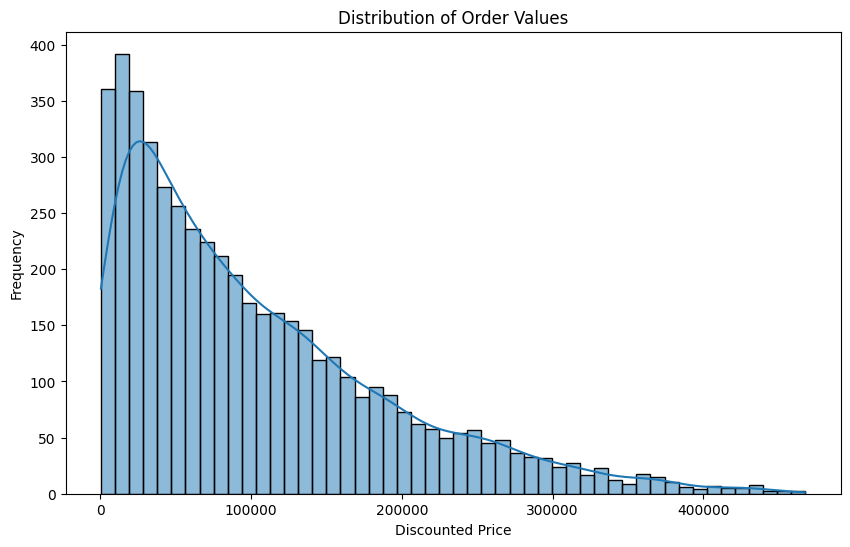

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['discounted_price'], bins=50, kde=True)
plt.title('Distribution of Order Values')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

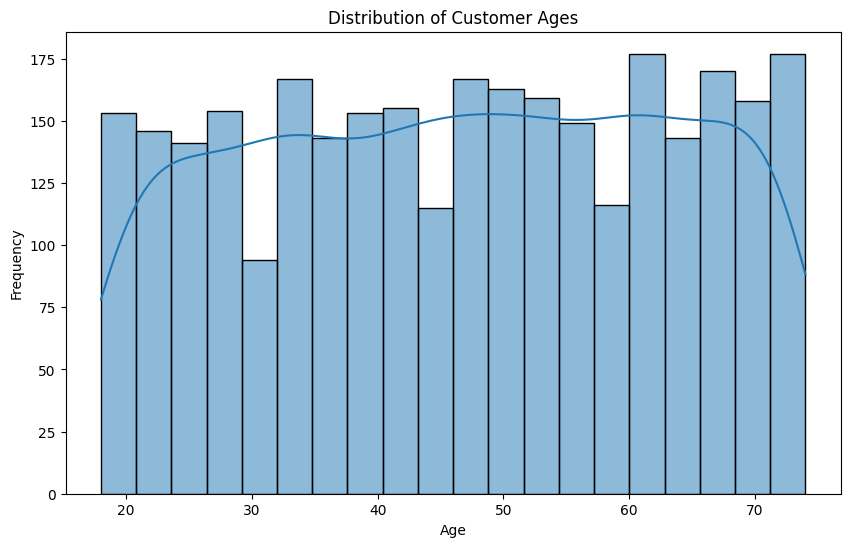

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_dataset['age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')


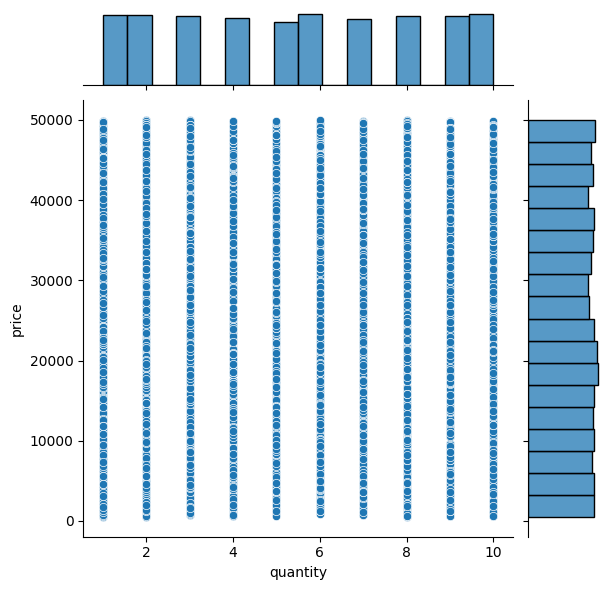

In [166]:
sns.jointplot(data=merged_data,x='quantity', y='price', kind='scatter')

Text(0.5, 0, 'Payment method')

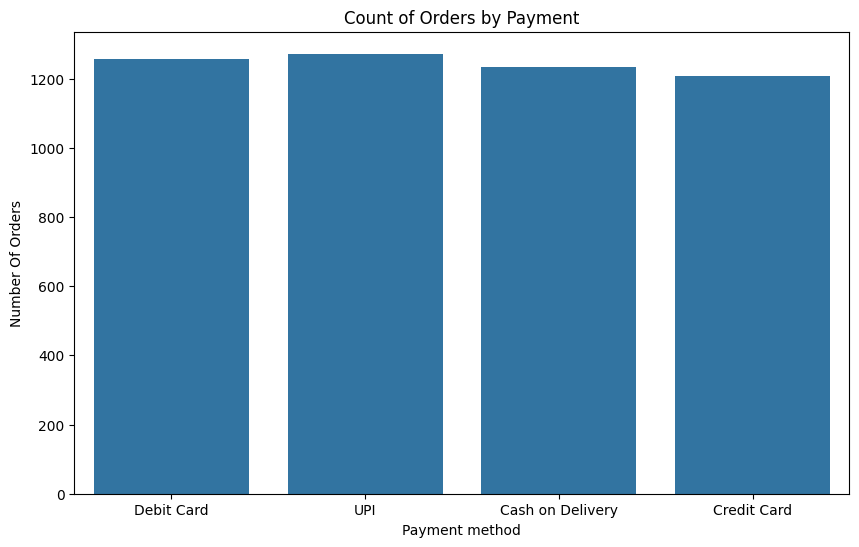

In [167]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data,x='payment_method')
plt.title('Count of Orders by Payment')
plt.ylabel('Number Of Orders')
plt.xlabel('Payment method')


/tmp/ipython-input-3291605090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_category,x='category', y='discounted_price', palette='rainbow')


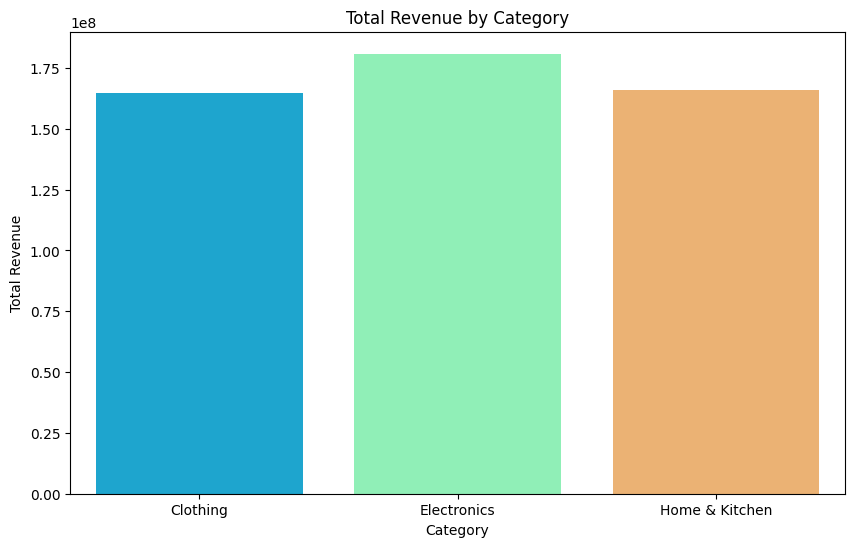

In [168]:
revenue_by_category = merged_data.groupby('category')['discounted_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_category,x='category', y='discounted_price', palette='rainbow')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

/tmp/ipython-input-712881190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data,x='category', y='discounted_price', palette='colorblind')


Text(0, 0.5, 'Discounted Price')

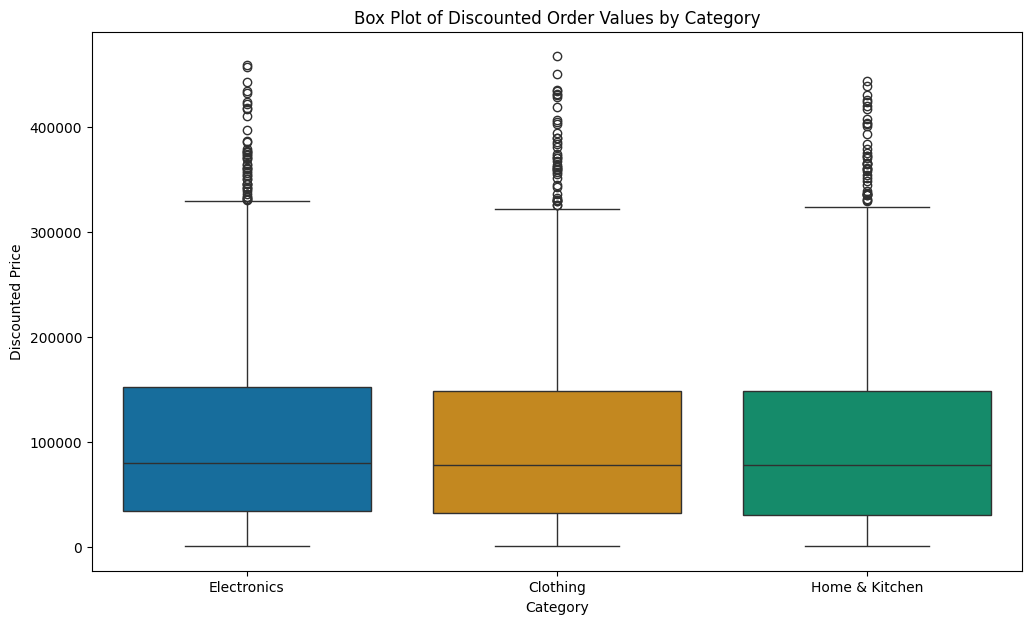

In [169]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=merged_data,x='category', y='discounted_price', palette='colorblind')
plt.title('Box Plot of Discounted Order Values by Category')
plt.xlabel('Category')
plt.ylabel('Discounted Price')


/tmp/ipython-input-2572414358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_data,x='city', y='discounted_price', palette='bright')


Text(0, 0.5, 'Discounted Price')

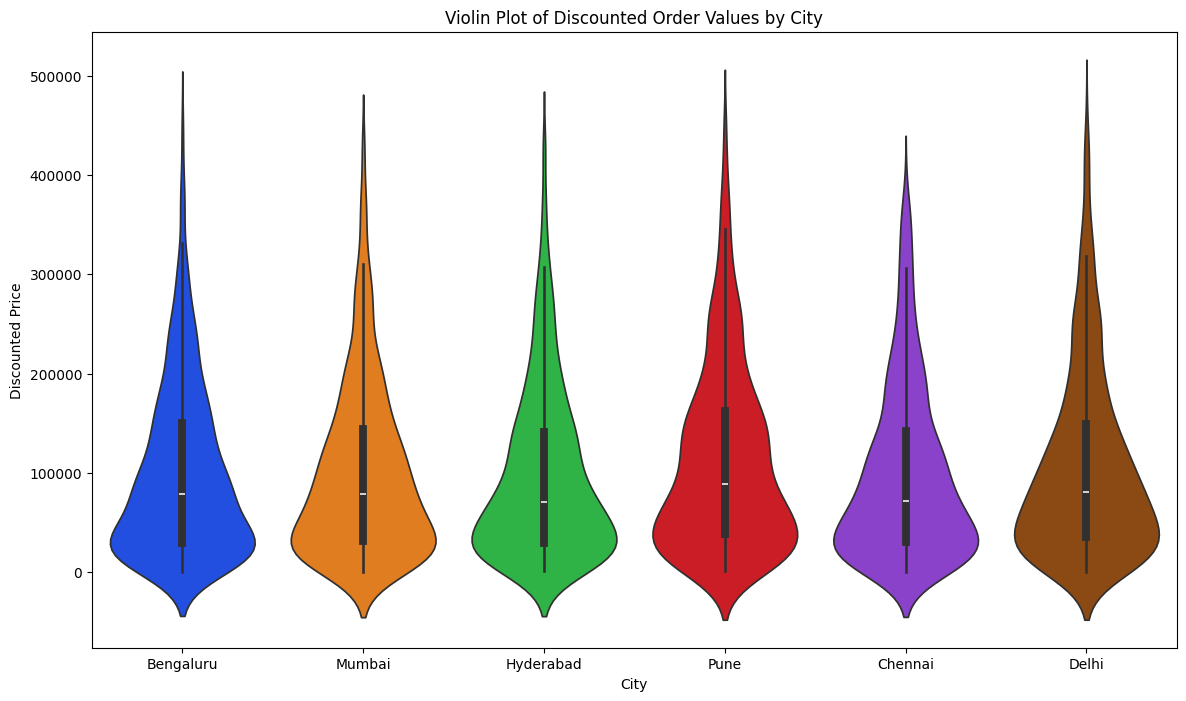

In [170]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=merged_data,x='city', y='discounted_price', palette='bright')
plt.title('Violin Plot of Discounted Order Values by City')
plt.xlabel('City')
plt.ylabel('Discounted Price')


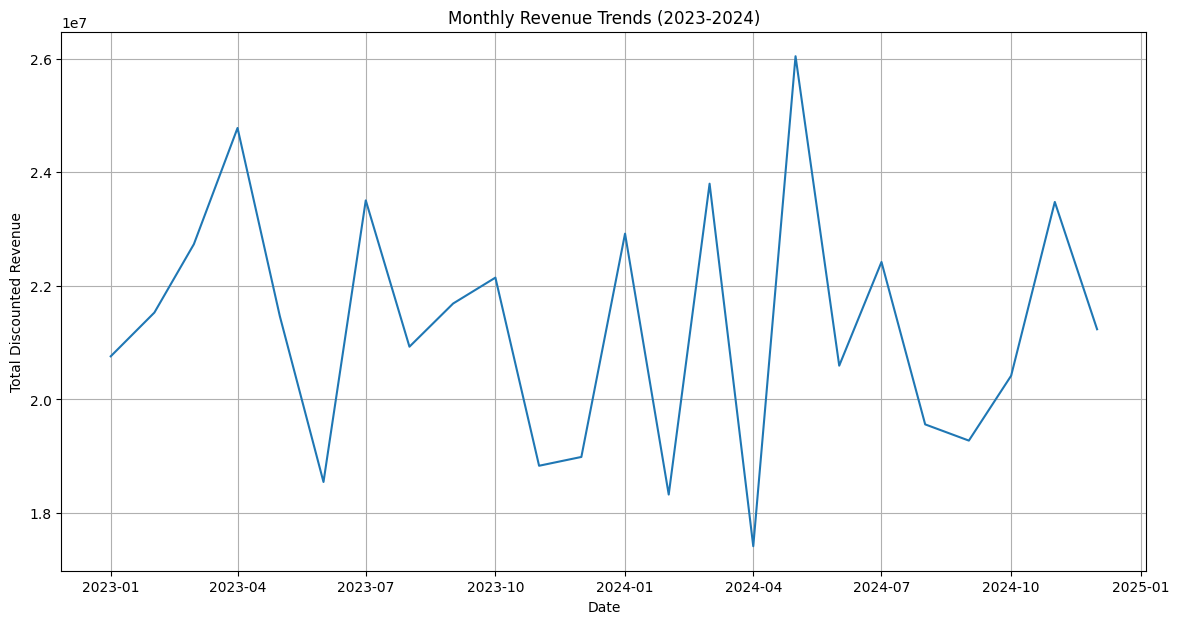

In [171]:
monthly_sales_df = merged_data.groupby(['year', 'month'])['discounted_price'].sum().reset_index()
monthly_sales_df['date'] = pd.to_datetime(monthly_sales_df['year'].astype(str) + '-' + monthly_sales_df['month'].astype(str) + '-01')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales_df, x='date', y='discounted_price')
plt.title('Monthly Revenue Trends (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Total Discounted Revenue')
plt.grid(True)


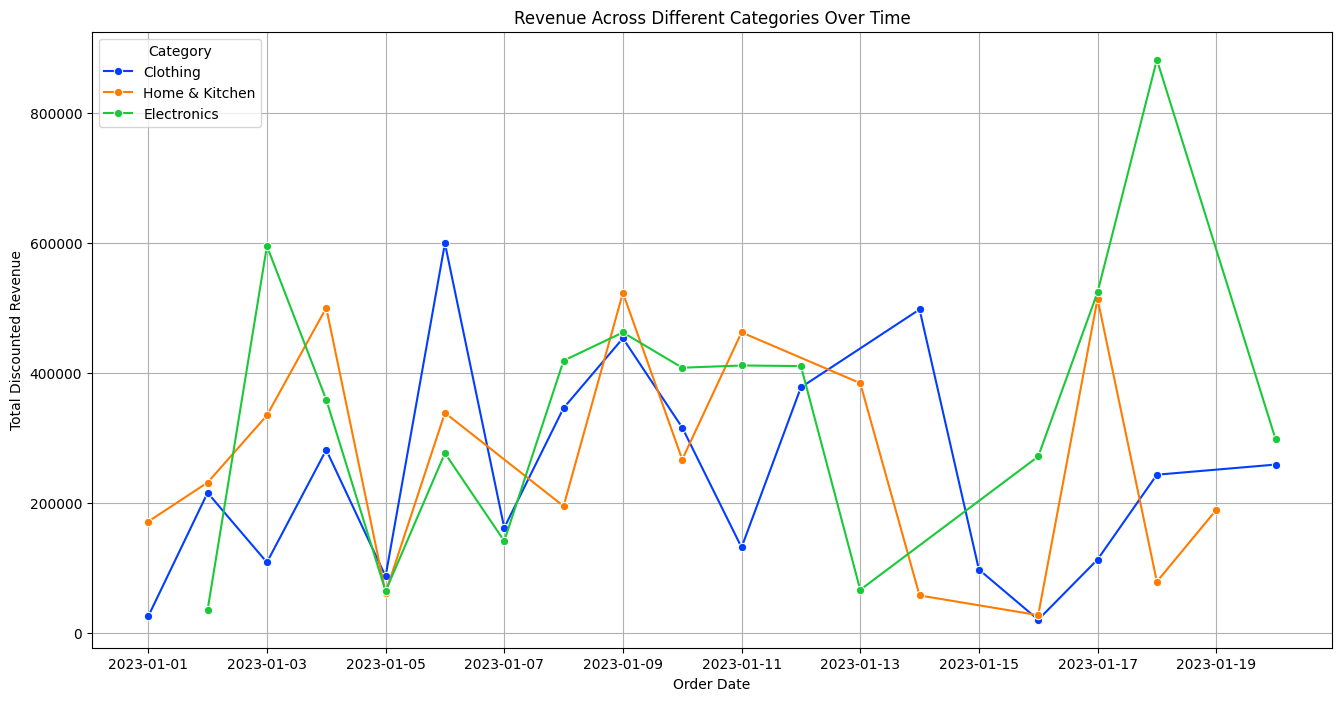

In [172]:
category_monthly_revenue = merged_data.groupby(['order_date', 'category'])['discounted_price'].sum().head(50).reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(data=category_monthly_revenue, x='order_date', y='discounted_price', hue='category', marker='o', palette='bright')
plt.title('Revenue Across Different Categories Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Discounted Revenue')
plt.legend(title='Category')
plt.grid(True)


Text(0.5, 1.0, 'Revenue Distribution by Category')

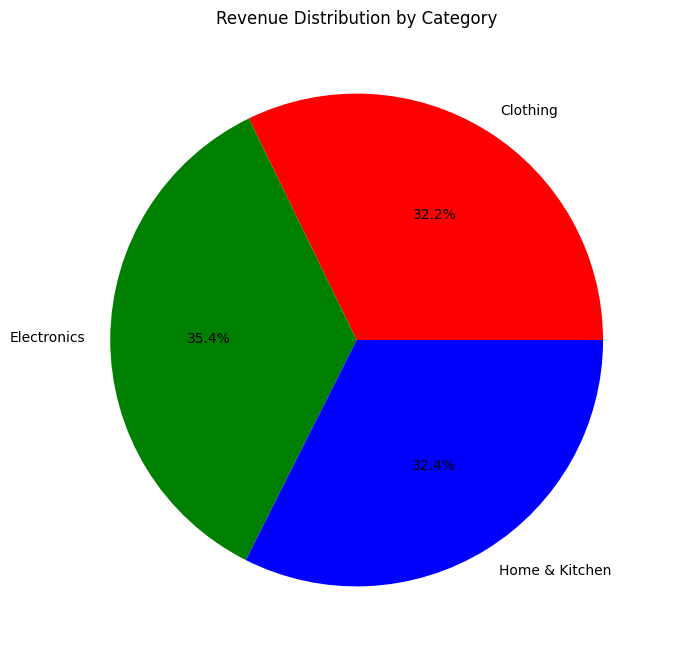

In [173]:
revenue_by_category = merged_data.groupby('category')['discounted_price'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category['discounted_price'], labels=revenue_by_category['category'], autopct='%1.1f%%', colors=['red','green','blue'])
plt.title('Revenue Distribution by Category')

Text(0, 0.5, 'Quantity Sold')

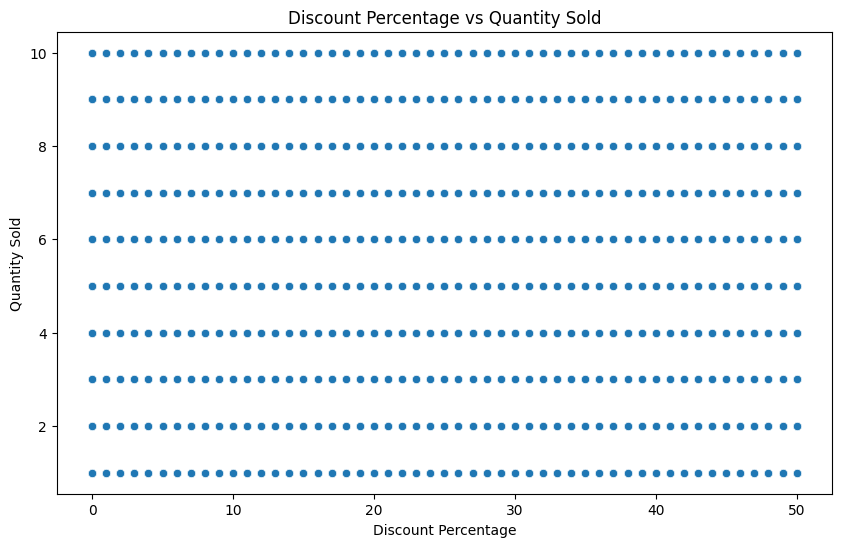

In [174]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='discount_percent', y='quantity')
plt.title('Discount Percentage vs Quantity Sold')
plt.xlabel('Discount Percentage')
plt.ylabel('Quantity Sold')



Text(0, 0.5, 'Total Discounted Revenue')

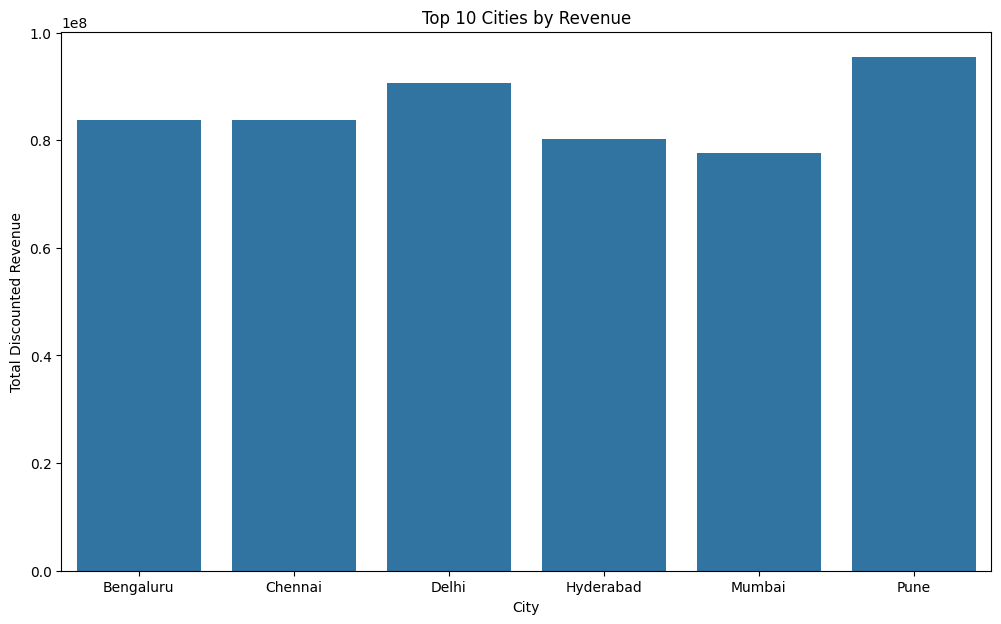

In [175]:
revenue_by_city = merged_data.groupby('city')['discounted_price'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=revenue_by_city, x='city', y='discounted_price')
plt.title('Top 10 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Total Discounted Revenue')



Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

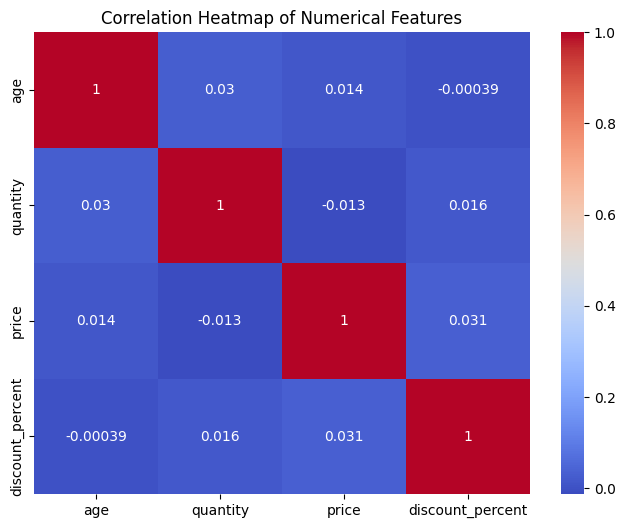

In [176]:
numerical_features = merged_data[['age', 'quantity', 'price', 'discount_percent']]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')


In [177]:
avg_revenue = pd.pivot_table(merged_data,values='discounted_price', index='category', columns='payment_method', aggfunc='mean')
avg_revenue


payment_method,Cash on Delivery,Credit Card,Debit Card,UPI
category,,,,
Clothing,98967.208939,100909.810617,100544.517052,107475.002393
Electronics,110557.385105,98636.062917,102356.503756,109924.827583
Home & Kitchen,97261.644853,96253.773351,106382.969566,104314.269346


/tmp/ipython-input-3059359210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='discounted_price', data=merged_data.groupby('category')['discounted_price'].sum().reset_index(), palette='viridis',ax=axes[0, 0])
/tmp/ipython-input-3059359210.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data,x='payment_method', palette='Set2',ax=axes[1, 1])


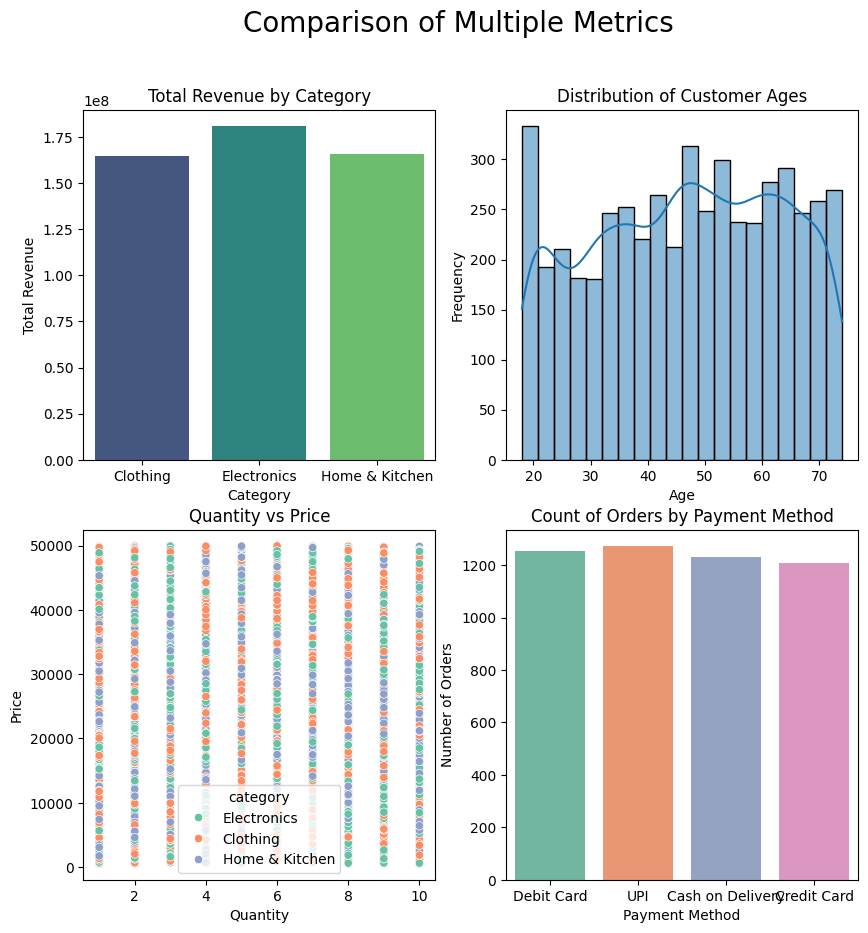

In [178]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Comparison of Multiple Metrics', fontsize=20)


sns.barplot(x='category', y='discounted_price', data=merged_data.groupby('category')['discounted_price'].sum().reset_index(), palette='viridis',ax=axes[0, 0])
axes[0, 0].set_title('Total Revenue by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Total Revenue')


sns.histplot(data=merged_data, x='age', bins=20, kde=True,ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Customer Ages')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')


sns.scatterplot(data=merged_data, x='quantity', y='price', hue='category', palette='Set2',ax=axes[1, 0])
axes[1, 0].set_title('Quantity vs Price')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Price')


sns.countplot(data=merged_data,x='payment_method', palette='Set2',ax=axes[1, 1])
axes[1, 1].set_title('Count of Orders by Payment Method')
axes[1, 1].set_xlabel('Payment Method')
axes[1, 1].set_ylabel('Number of Orders')


plt.show()

<Figure size 1000x800 with 0 Axes>

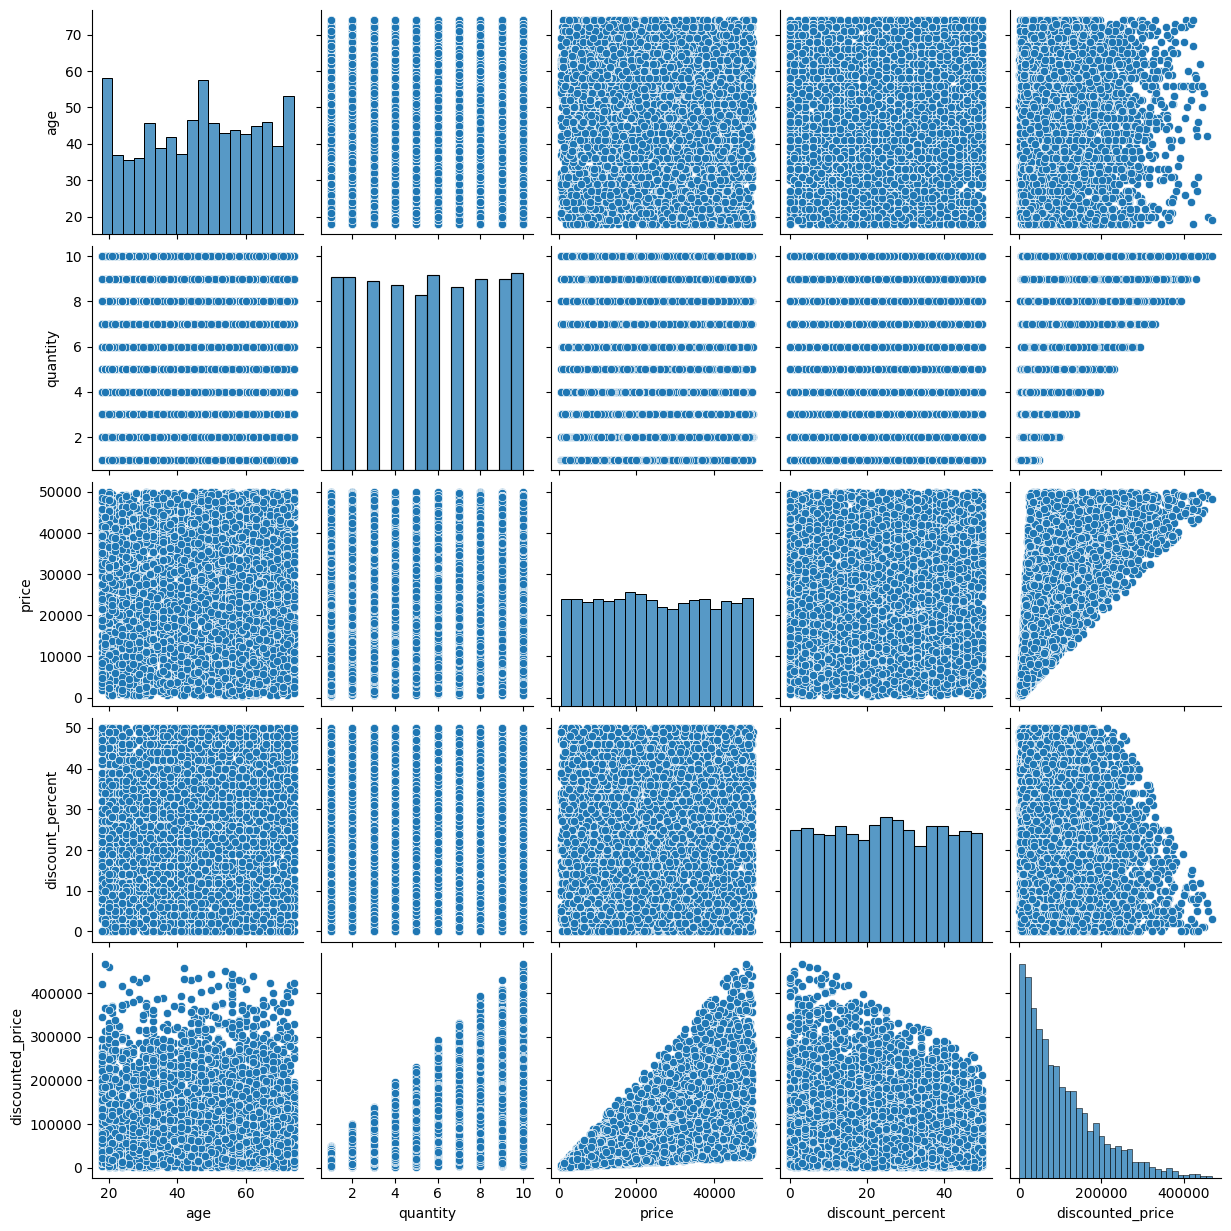

In [179]:
numerical_features_for_pairplot = merged_data[['age', 'quantity', 'price', 'discount_percent', 'discounted_price']]

plt.figure(figsize=(10, 8))
sns.pairplot(numerical_features_for_pairplot)



/tmp/ipython-input-2028907599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


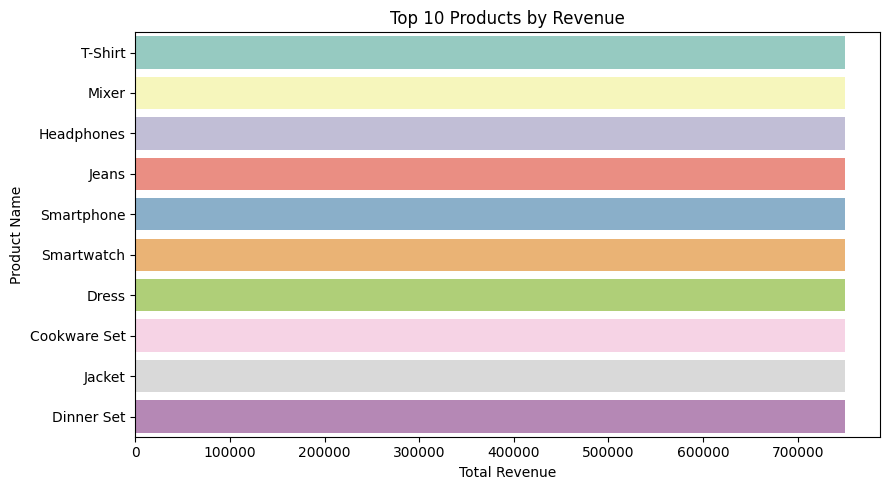

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))
sns.barplot(
    data=top_revenue_products,
    x='total_revenue_per_product', palette='Set3',
    y='product_name'
)

plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

/tmp/ipython-input-166145997.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_discount_level = merged_data.groupby('discount_level')['discounted_price'].mean().reset_index()
/tmp/ipython-input-166145997.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_discount_level, x='discount_level', y='discounted_price', palette='viridis')


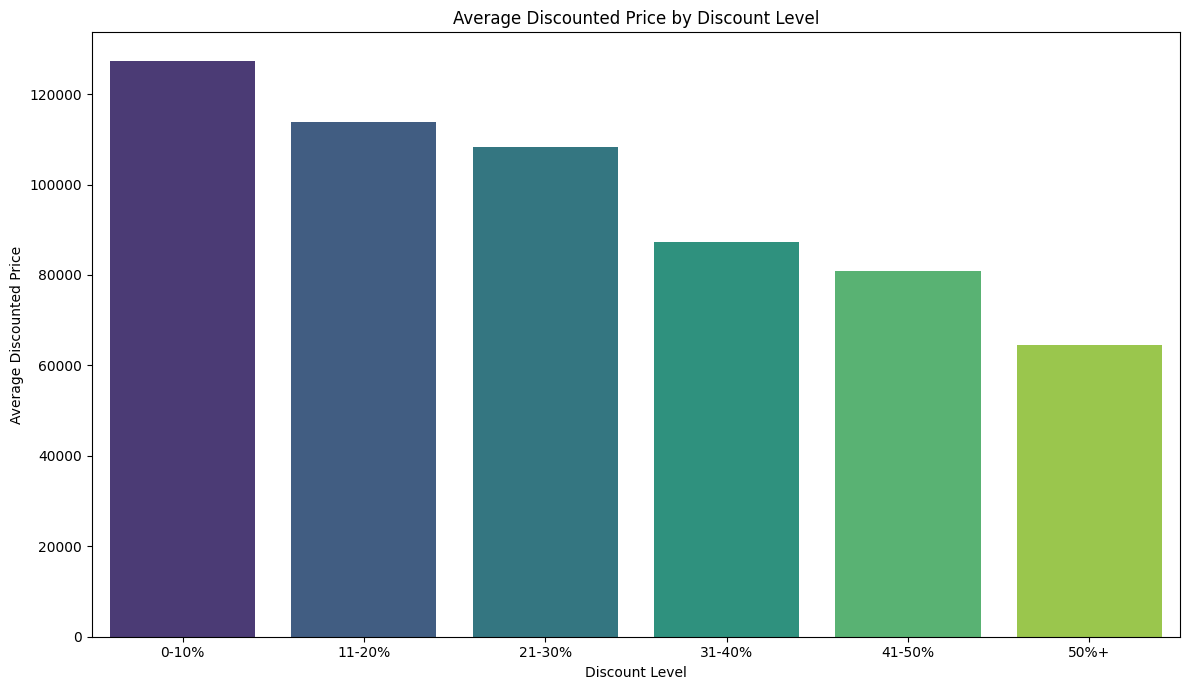

In [181]:
import numpy as np

discount_bins = [0, 10, 20, 30, 40, 50, 60] # Define bins for discount percentages
discount_labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '50%+']

merged_data['discount_level'] = pd.cut(merged_data['discount_percent'], bins=discount_bins, labels=discount_labels, right=False)

sales_by_discount_level = merged_data.groupby('discount_level')['discounted_price'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=sales_by_discount_level, x='discount_level', y='discounted_price', palette='viridis')
plt.title('Average Discounted Price by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Average Discounted Price')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2969775798.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = merged_data.groupby(pd.Grouper(key='order_date', freq='M'))['discounted_price'].sum().reset_index()
/tmp/ipython-input-2969775798.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=min_date_campaign.to_period('M').start_time, end=max_date_campaign.to_period('M').end_time, freq='M')


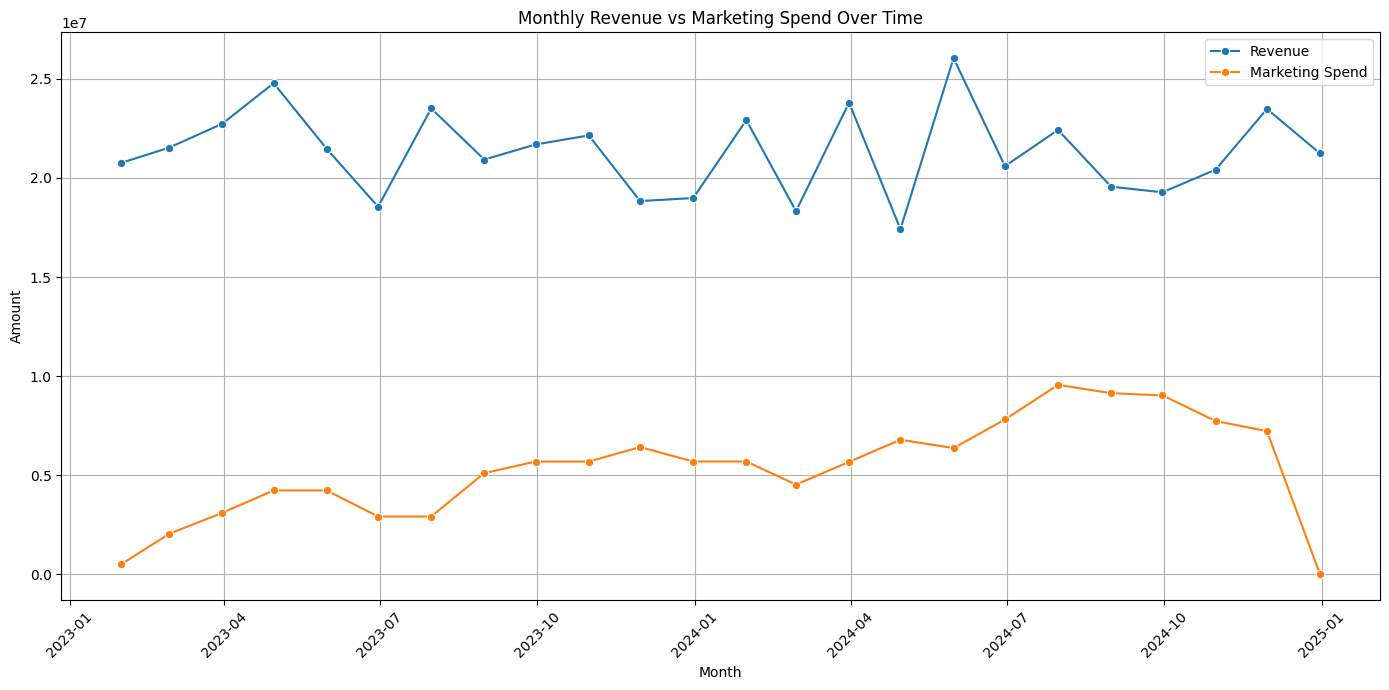

In [182]:
monthly_revenue = merged_data.groupby(pd.Grouper(key='order_date', freq='M'))['discounted_price'].sum().reset_index()
monthly_revenue.columns = ['date', 'revenue']
monthly_revenue['month_year'] = monthly_revenue['date'].dt.to_period('M')

marketing_campaigns['start_date'] = pd.to_datetime(marketing_campaigns['start_date'])
marketing_campaigns['end_date'] = pd.to_datetime(marketing_campaigns['end_date'])

# Create a list to store monthly budgets
monthly_budgets = []

# Iterate through each month in the revenue data's date range
min_date_campaign = marketing_campaigns['start_date'].min()
max_date_campaign = marketing_campaigns['end_date'].max()
date_range = pd.date_range(start=min_date_campaign.to_period('M').start_time, end=max_date_campaign.to_period('M').end_time, freq='M')

for month_start in date_range:
    month_end = month_start + pd.offsets.MonthEnd(0)
    # Sum budgets of campaigns active during this month
    active_campaigns = marketing_campaigns[
        ((marketing_campaigns['start_date'] <= month_end) & (marketing_campaigns['end_date'] >= month_start))
    ]
    total_budget_for_month = active_campaigns['budget'].sum()
    monthly_budgets.append({'date': month_start, 'marketing_spend': total_budget_for_month})

monthly_marketing_spend = pd.DataFrame(monthly_budgets)
monthly_marketing_spend['month_year'] = monthly_marketing_spend['date'].dt.to_period('M')

# Merge the two dataframes
merged_marketing_sales = pd.merge(monthly_revenue, monthly_marketing_spend[['month_year', 'marketing_spend']], on='month_year', how='inner')

plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_marketing_sales, x='date', y='revenue', label='Revenue', marker='o')
sns.lineplot(data=merged_marketing_sales, x='date', y='marketing_spend', label='Marketing Spend', marker='o')
plt.title('Monthly Revenue vs Marketing Spend Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

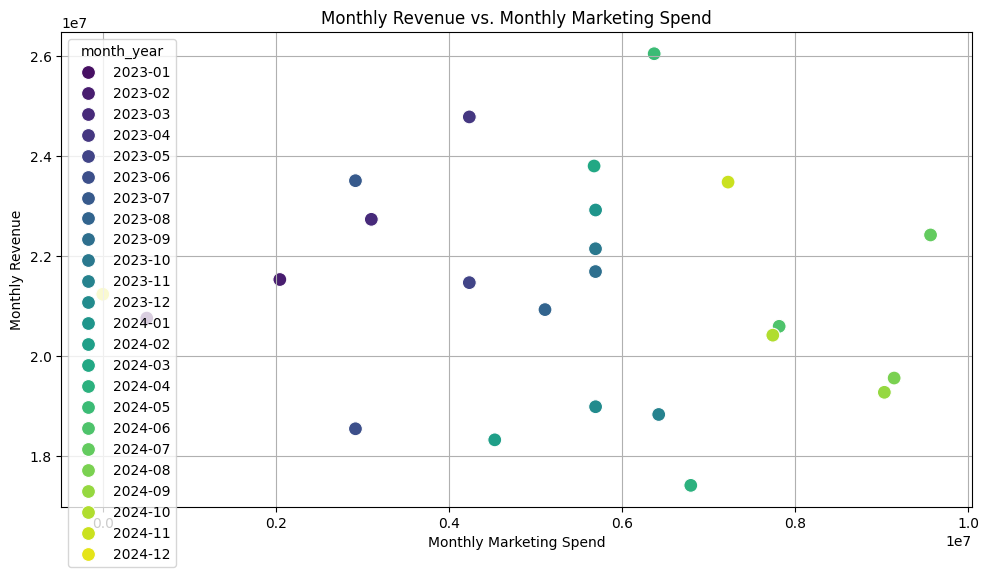

In [183]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_marketing_sales, x='marketing_spend', y='revenue', hue='month_year', palette='viridis', s=100)
plt.title('Monthly Revenue vs. Monthly Marketing Spend')
plt.xlabel('Monthly Marketing Spend')
plt.ylabel('Monthly Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()